## "Illegal Immigrant" vs "Undocumented Immigrant"

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
import numpy.linalg as ln
import scipy.stats as st

%matplotlib notebook
plt.rcParams.update({'font.size': 12})

In [2]:
# function for calculating the t-test for two independent samples
def ttest(data1, data2):
    # calculate means
    mean1, mean2 = np.mean(data1), np.mean(data2)
    # calculate standard errors
    s1, s2 = np.std(data1), np.std(data2)
    n1, n2 = len(data1), len(data2)
    # standard error on the difference between the samples
    s = np.sqrt(((n1-1)*s1**2 + (n2-1)*s2**2)/(n1 + n2 - 2))
    se = s*np.sqrt((1/n1)+(1/n2))
    # calculate the t statistic
    t_stat = (mean1 - mean2)/se
    # degrees of freedom
    df = (((s1**2)/n1)+((s2**2)/n2))/((((s1**2)/n1)/(n1-1))+((((s2**2)/n2)/(n2-1))))
    # calculate the p-value
    p = (1.0 - st.t.cdf(abs(t_stat), df)) * 2.0
    return p

In [3]:
illegalimmigrant = pd.read_csv("ILLEGAL IMMIGRANT.csv")
illegalimmigrants = pd.read_csv("ILLEGAL IMMIGRANTS.csv")
illegalimmigration = pd.read_csv("ILLEGAL IMMIGRATION.csv")
illegalData = pd.concat([illegalimmigrant, illegalimmigrants, illegalimmigration])

undocumentedimmigrant = pd.read_csv("UNDOCUMENTED IMMIGRANT.csv")
undocumentedimmigrants = pd.read_csv("UNDOCUMENTED IMMIGRANTS.csv")
undocumentedimmigration = pd.read_csv("UNDOCUMENTED IMMIGRATION.csv")
undocumentedData = pd.concat([undocumentedimmigrant, undocumentedimmigrant, undocumentedimmigration])


In [4]:
yearData = pd.DataFrame({'Year': [x for x in range(1990,2018)]})
for word in [(illegalData, 'illegal'), (undocumentedData, 'undocumented')]:
    mean_polarity = []
    mean_subjectivity = []
    volume = []
    ACAD = []
    FIC = []
    MAG = []
    NEWS = []
    SPOK = []
    ACAD_count = []
    FIC_count = []
    MAG_count = []
    NEWS_count = []
    SPOK_count = []
    for x in range(1990, 2018):
        mean_polarity.append(word[0][word[0]['Year'] == x]['Polarity'].mean())
        mean_subjectivity.append(word[0][word[0]['Year'] == x]['Subjectivity'].mean())
        volume.append(word[0][word[0]['Year'] == x].shape[0])
        for name in [(ACAD, 'ACAD', ACAD_count), (FIC, 'FIC', FIC_count), (MAG,'MAG',MAG_count), (NEWS,'NEWS',NEWS_count), (SPOK,'SPOK',SPOK_count)]:
            name[2].append((word[0][(word[0]['Year'] == x) & (word[0]['Type'] == name[1])]).shape[0])
            if len(word[0][(word[0]['Year'] == x) & (word[0]['Type'] == name[1])]['Polarity']) != 0:
                name[0].append((word[0][(word[0]['Year'] == x) & (word[0]['Type'] == name[1])]['Polarity']).mean()) 
            else:
                name[0].append(np.nan)
    temp = pd.DataFrame({'Year': [x for x in range(1990, 2018)], word[1] + 'P': mean_polarity, word[1] + 'S': mean_subjectivity, word[1] + 'Volume': volume, word[1] + 'ACADP': ACAD, word[1] + 'FICP': FIC, word[1] + 'MAGP': MAG, word[1] + 'NEWSP': NEWS, word[1] + 'SPOKP': SPOK, word[1] + 'ACADV': ACAD_count, word[1] + 'FICV': FIC_count, word[1] + 'MAGV': MAG_count, word[1] + 'NEWSV': NEWS_count, word[1] + 'SPOKV': SPOK_count} )
    yearData = pd.merge(yearData, temp)


Text(0.5, 1.0, 'Figure 1: Frequency of "Undocumented" and "Illegal" Over Time')

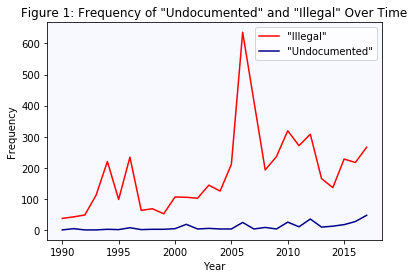

In [5]:
ax1 = yearData.plot(x = 'Year', color = ['red','darkblue'], y = ['illegalVolume','undocumentedVolume'], label = ['\"Illegal\"','\"Undocumented\"'])
ax1.set_xlabel('Year')
ax1.set_ylabel('Frequency')
ax1.set_facecolor('ghostwhite')
ax1.set_title('Figure 1: Frequency of \"Undocumented\" and \"Illegal\" Over Time')


Text(0.5, 1.0, 'Figure 2: Frequency of "Undocumented" Over Time by Source Type')

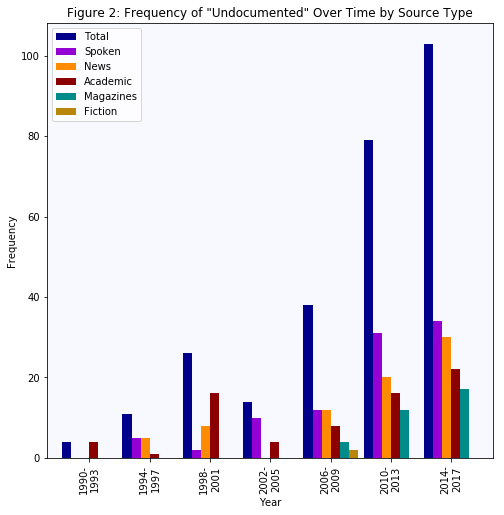

In [6]:
year = ['1990-\n1993','1994-\n1997','1998-\n2001','2002-\n2005', '2006-\n2009', '2010-\n2013', '2014-\n2017']
total = []
academic = []
fiction = []
mag = []
news = []
spoken = []
for x in range(7):
    new = yearData[(yearData['Year'] >= (1990 + 4*x)) & (yearData['Year'] < 1990 + 4*(x+1))]
    total.append(new['undocumentedVolume'].sum())
    academic.append(new['undocumentedACADV'].sum())
    fiction.append(new['undocumentedFICV'].sum())
    mag.append(new['undocumentedMAGV'].sum())
    news.append(new['undocumentedNEWSV'].sum())
    spoken.append(new['undocumentedSPOKV'].sum())
tempData = pd.DataFrame({'Year': year,'Total': total, 'Academic': academic, 'Fiction': fiction, 'Magazines': mag, 'News': news, 'Spoken': spoken})

ax2 = tempData.plot(kind = 'bar', x = 'Year', figsize=(8,8), width=.9, color = ['darkblue','darkviolet','darkorange','darkred','darkcyan','darkgoldenrod'], y = ['Total','Spoken','News','Academic','Magazines','Fiction'])
ax2.set_xlabel('Year')
ax2.set_ylabel('Frequency')
ax2.set_facecolor('ghostwhite')
ax2.set_title('Figure 2: Frequency of \"Undocumented\" Over Time by Source Type')


Text(0.5, 1.0, 'Figure 3: Mean Polarity of "Undocumented" and "Illegal" Over Time')

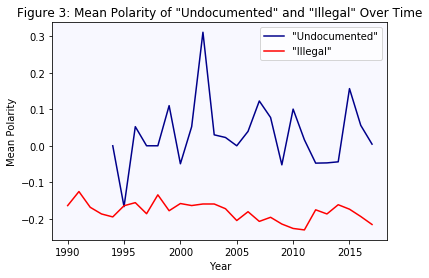

In [7]:
ax = yearData.plot(x = 'Year', color = ['darkblue','red'], y = ['undocumentedP','illegalP'], label = ['\"Undocumented\"','\"Illegal\"'])
ax.set_xlabel('Year')
ax.set_ylabel('Mean Polarity')
ax.set_facecolor('ghostwhite')
ax.set_title('Figure 3: Mean Polarity of \"Undocumented\" and \"Illegal\" Over Time')


In [8]:
u = undocumentedData['Polarity']
i = illegalData['Polarity']
print('\t\t\t\t\"Undocumented\"','\t\t\"Illegal\"')
print('Number:\t\t\t\t', len(u),'\t\t\t', len(i))
print('Mean Polarity:\t\t\t', round(u.mean(),5), '\t\t', round(i.mean(),5))
print('Standard Deviation:\t\t', round(u.std(),5), '\t\t', round(i.std(),5))
print('Difference-in-Means Test p-vaule:\t\t',ttest(u,i))


				"Undocumented" 		"Illegal"
Number:				 275 			 5156
Mean Polarity:			 0.03447 		 -0.18884
Standard Deviation:		 0.22919 		 0.1976
Difference-in-Means Test p-vaule:		 0.0


In [9]:
################SURVEY#######################
data = pd.read_csv("SurveyData.csv")
data = data[data['Participation'] == 'Yes']
print('Average Survey Completion Time:', round(data['Duration (in seconds)'].mean()/60,4), 'minutes')

Average Survey Completion Time: 4.4337 minutes


In [10]:
data['illegal'] = data['I6'].isnull()
def ui(row):
    if (row['illegal'] == True):
        return 0
    else:
        return 1
    
data['illegal'] = data.apply(ui, axis = 1)

dataU = data[data['illegal'] == 0]
dataI = data[data['illegal'] == 1]
Ttotal = data.shape[0]
Utotal = dataU.shape[0]
Itotal = dataI.shape[0]

In [11]:
#Demographic Characteristics of Sample
print('\t\t\t\t', "Illegal\t", "Undocumented\t", "Total")
print('Gender')
print('Female\t\t\t\t', dataI[dataI['Q1'] == 'Female'].shape[0], round(dataI[dataI['Q1'] == 'Female'].shape[0]/Itotal,2),'\t', dataU[dataU['Q1'] == 'Female'].shape[0], round(dataU[dataU['Q1'] == 'Female'].shape[0]/Utotal,2),'\t', data[data['Q1'] == 'Female'].shape[0], round(data[data['Q1'] == 'Female'].shape[0]/Ttotal,2))
print('Male\t\t\t\t', dataI[dataI['Q1'] == 'Male'].shape[0], round(dataI[dataI['Q1'] == 'Male'].shape[0]/Itotal,2),'\t', dataU[dataU['Q1'] == 'Male'].shape[0], round(dataU[dataU['Q1'] == 'Male'].shape[0]/Utotal,2),'\t', data[data['Q1'] == 'Male'].shape[0], round(data[data['Q1'] == 'Male'].shape[0]/Ttotal,2))
print('\nEducation Level')
print('High School\t\t\t', dataI[dataI['Q2'] == 'High School'].shape[0], round(dataI[dataI['Q2'] == 'High School'].shape[0]/Itotal,2),'\t', dataU[dataU['Q2'] == 'High School'].shape[0], round(dataU[dataU['Q2'] == 'High School'].shape[0]/Utotal,2),'\t', data[data['Q2'] == 'High School'].shape[0], round(data[data['Q2'] == 'High School'].shape[0]/Ttotal,2))
print('Some College\t\t\t', dataI[dataI['Q2'] == 'Some College'].shape[0], round(dataI[dataI['Q2'] == 'Some College'].shape[0]/Itotal,2),'\t', dataU[dataU['Q2'] == 'Some College'].shape[0], round(dataU[dataU['Q2'] == 'Some College'].shape[0]/Utotal,2),'\t', data[data['Q2'] == 'Some College'].shape[0], round(data[data['Q2'] == 'Some College'].shape[0]/Ttotal,2))
print('Bachelor\'s Degree\t\t', dataI[dataI['Q2'] == 'Bachelor\'s Degree'].shape[0], round(dataI[dataI['Q2'] == 'Bachelor\'s Degree'].shape[0]/Itotal,2),'\t', dataU[dataU['Q2'] == 'Bachelor\'s Degree'].shape[0], round(dataU[dataU['Q2'] == 'Bachelor\'s Degree'].shape[0]/Utotal,2),'\t', data[data['Q2'] == 'Bachelor\'s Degree'].shape[0], round(data[data['Q2'] == 'Bachelor\'s Degree'].shape[0]/Ttotal,2))
print('Master\'s Degree\t\t\t', dataI[dataI['Q2'] == 'Master\'s Degree'].shape[0], round(dataI[dataI['Q2'] == 'Master\'s Degree'].shape[0]/Itotal,2),'\t', dataU[dataU['Q2'] == 'Master\'s Degree'].shape[0], round(dataU[dataU['Q2'] == 'Master\'s Degree'].shape[0]/Utotal,2),'\t', data[data['Q2'] == 'Master\'s Degree'].shape[0], round(data[data['Q2'] == 'Master\'s Degree'].shape[0]/Ttotal,2))
print('Doctoral Degree or Equivalent\t', dataI[dataI['Q2'] == 'Doctoral Degree or Equivalent'].shape[0], round(dataI[dataI['Q2'] == 'Doctoral Degree or Equivalent'].shape[0]/Itotal,2),'\t', dataU[dataU['Q2'] == 'Doctoral Degree or Equivalent'].shape[0], round(dataU[dataU['Q2'] == 'Doctoral Degree or Equivalent'].shape[0]/Utotal,2),'\t', data[data['Q2'] == 'Doctoral Degree or Equivalent'].shape[0], round(data[data['Q2'] == 'Doctoral Degree or Equivalent'].shape[0]/Ttotal,2))
print('Other\t\t\t\t', dataI[dataI['Q2'] == 'Other'].shape[0], round(dataI[dataI['Q2'] == 'Other'].shape[0]/Itotal,2),'\t\t', dataU[dataU['Q2'] == 'Other'].shape[0], round(dataU[dataU['Q2'] == 'Other'].shape[0]/Utotal,2),'\t\t', data[data['Q2'] == 'Other'].shape[0], round(data[data['Q2'] == 'Other'].shape[0]/Ttotal,2))
print('\nRace/Ethnicity')
print('African American or Black\t', dataI[dataI['Q3'] == 'African American or Black'].shape[0], round(dataI[dataI['Q3'] == 'African American or Black'].shape[0]/Itotal,2),'\t', dataU[dataU['Q3'] == 'African American or Black'].shape[0], round(dataU[dataU['Q3'] == 'African American or Black'].shape[0]/Utotal,2),'\t', data[data['Q3'] == 'African American or Black'].shape[0], round(data[data['Q3'] == 'African American or Black'].shape[0]/Ttotal,2))
print('Asian\t\t\t\t', dataI[dataI['Q3'] == 'Asian'].shape[0], round(dataI[dataI['Q3'] == 'Asian'].shape[0]/Itotal,2),'\t', dataU[dataU['Q3'] == 'Asian'].shape[0], round(dataU[dataU['Q3'] == 'Asian'].shape[0]/Utotal,2),'\t', data[data['Q3'] == 'Asian'].shape[0], round(data[data['Q3'] == 'Asian'].shape[0]/Ttotal,2))
print('Caucasian or White\t\t', dataI[dataI['Q3'] == 'Caucasian or White'].shape[0], round(dataI[dataI['Q3'] == 'Caucasian or White'].shape[0]/Itotal,2),'\t', dataU[dataU['Q3'] == 'Caucasian or White'].shape[0], round(dataU[dataU['Q3'] == 'Caucasian or White'].shape[0]/Utotal,2),'\t', data[data['Q3'] == 'Caucasian or White'].shape[0], round(data[data['Q3'] == 'Caucasian or White'].shape[0]/Ttotal,2))
print('Hispanic or Latino\t\t', dataI[dataI['Q3'] == 'Hispanic or Latino'].shape[0], round(dataI[dataI['Q3'] == 'Hispanic or Latino'].shape[0]/Itotal,2),'\t', dataU[dataU['Q3'] == 'Hispanic or Latino'].shape[0], round(dataU[dataU['Q3'] == 'Hispanic or Latino'].shape[0]/Utotal,2),'\t', data[data['Q3'] == 'Hispanic or Latino'].shape[0], round(data[data['Q3'] == 'Hispanic or Latino'].shape[0]/Ttotal,2))
print('Native American\t\t\t', dataI[dataI['Q3'] == 'Native American or American Indian'].shape[0], round(dataI[dataI['Q3'] == 'Native American or American Indian'].shape[0]/Itotal,2),'\t', dataU[dataU['Q3'] == 'Native American or American Indian'].shape[0], round(dataU[dataU['Q3'] == 'Native American or American Indian'].shape[0]/Utotal,2),'\t', data[data['Q3'] == 'Native American or American Indian'].shape[0], round(data[data['Q3'] == 'Native American or American Indian'].shape[0]/Ttotal,2))
print('Pacific Islander\t\t', dataI[dataI['Q3'] == 'Pacific Islander'].shape[0], round(dataI[dataI['Q3'] == 'Pacific Islander'].shape[0]/Itotal,2),'\t\t', dataU[dataU['Q3'] == 'Pacific Islander'].shape[0], round(dataU[dataU['Q3'] == 'Pacific Islander'].shape[0]/Utotal,2),'\t\t', data[data['Q3'] == 'Pacific Islander'].shape[0], round(data[data['Q3'] == 'Pacific Islander'].shape[0]/Ttotal,2))
print('Other\t\t\t\t', dataI[dataI['Q3'] == 'Other'].shape[0], round(dataI[dataI['Q3'] == 'Other'].shape[0]/Itotal,2),'\t', dataU[dataU['Q3'] == 'Other'].shape[0], round(dataU[dataU['Q3'] == 'Other'].shape[0]/Utotal,2),'\t', data[data['Q3'] == 'Other'].shape[0], round(data[data['Q3'] == 'Other'].shape[0]/Ttotal,2))
print('\nVote in 2016 Election')
print('Donald Trump\t\t\t', dataI[dataI['Q4'] == 'Donald Trump'].shape[0], round(dataI[dataI['Q4'] == 'Donald Trump'].shape[0]/Itotal,2),'\t', dataU[dataU['Q4'] == 'Donald Trump'].shape[0], round(dataU[dataU['Q4'] == 'Donald Trump'].shape[0]/Utotal,2),'\t', data[data['Q4'] == 'Donald Trump'].shape[0], round(data[data['Q4'] == 'Donald Trump'].shape[0]/Ttotal,2))
print('Hillary Clinton\t\t\t', dataI[dataI['Q4'] == 'Hillary Clinton'].shape[0], round(dataI[dataI['Q4'] == 'Hillary Clinton'].shape[0]/Itotal,2),'\t', dataU[dataU['Q4'] == 'Hillary Clinton'].shape[0], round(dataU[dataU['Q4'] == 'Hillary Clinton'].shape[0]/Utotal,2),'\t', data[data['Q4'] == 'Hillary Clinton'].shape[0], round(data[data['Q4'] == 'Hillary Clinton'].shape[0]/Ttotal,2))
print('Other\t\t\t\t', dataI[dataI['Q4'] == 'Other'].shape[0], round(dataI[dataI['Q4'] == 'Other'].shape[0]/Itotal,2),'\t', dataU[dataU['Q4'] == 'Other'].shape[0], round(dataU[dataU['Q4'] == 'Other'].shape[0]/Utotal,2),'\t', data[data['Q4'] == 'Other'].shape[0], round(data[data['Q4'] == 'Other'].shape[0]/Ttotal,2))
print('Did not vote\t\t\t', dataI[dataI['Q4'] == 'Did not vote'].shape[0], round(dataI[dataI['Q4'] == 'Did not vote'].shape[0]/Itotal,2),'\t', dataU[dataU['Q4'] == 'Did not vote'].shape[0], round(dataU[dataU['Q4'] == 'Did not vote'].shape[0]/Utotal,2),'\t', data[data['Q4'] == 'Did not vote'].shape[0], round(data[data['Q4'] == 'Did not vote'].shape[0]/Ttotal,2))


				 Illegal	 Undocumented	 Total
Gender
Female				 220 0.43 	 287 0.55 	 507 0.49
Male				 294 0.57 	 231 0.45 	 525 0.51

Education Level
High School			 50 0.1 	 51 0.1 	 101 0.1
Some College			 171 0.33 	 150 0.29 	 321 0.31
Bachelor's Degree		 209 0.41 	 221 0.43 	 430 0.42
Master's Degree			 66 0.13 	 76 0.15 	 142 0.14
Doctoral Degree or Equivalent	 17 0.03 	 18 0.03 	 35 0.03
Other				 1 0.0 		 2 0.0 		 3 0.0

Race/Ethnicity
African American or Black	 38 0.07 	 35 0.07 	 73 0.07
Asian				 37 0.07 	 26 0.05 	 63 0.06
Caucasian or White		 388 0.75 	 409 0.79 	 797 0.77
Hispanic or Latino		 32 0.06 	 32 0.06 	 64 0.06
Native American			 9 0.02 	 8 0.02 	 17 0.02
Pacific Islander		 2 0.0 		 0 0.0 		 2 0.0
Other				 8 0.02 	 8 0.02 	 16 0.02

Vote in 2016 Election
Donald Trump			 173 0.34 	 189 0.36 	 362 0.35
Hillary Clinton			 194 0.38 	 202 0.39 	 396 0.38
Other				 64 0.12 	 41 0.08 	 105 0.1
Did not vote			 83 0.16 	 86 0.17 	 169 0.16


In [12]:
#Chi-squared to check sample balance
GenderObs = np.array([[dataI[dataI['Q1'] == 'Female'].shape[0], dataU[dataU['Q1'] == 'Female'].shape[0]], [dataI[dataI['Q1'] == 'Male'].shape[0], dataU[dataU['Q1'] == 'Male'].shape[0]]])
EduObs = np.array([[dataI[dataI['Q2'] == 'High School'].shape[0],  dataU[dataU['Q2'] == 'High School'].shape[0]], [dataI[dataI['Q2'] == 'Some College'].shape[0],  dataU[dataU['Q2'] == 'Some College'].shape[0]], [dataI[dataI['Q2'] == 'Bachelor\'s Degree'].shape[0],  dataU[dataU['Q2'] == 'Bachelor\'s Degree'].shape[0]], [dataI[dataI['Q2'] == 'Master\'s Degree'].shape[0],  dataU[dataU['Q2'] == 'Master\'s Degree'].shape[0]], [dataI[dataI['Q2'] == 'Doctoral Degree or Equivalent'].shape[0], dataU[dataU['Q2'] == 'Doctoral Degree or Equivalent'].shape[0]], [dataI[dataI['Q2'] == 'Other'].shape[0], dataU[dataU['Q2'] == 'Other'].shape[0]]])
RaceObs = np.array([[dataI[dataI['Q3'] == 'African American or Black'].shape[0], dataU[dataU['Q3'] == 'African American or Black'].shape[0]],[dataI[dataI['Q3'] == 'Asian'].shape[0], dataU[dataU['Q3'] == 'Asian'].shape[0]], [dataI[dataI['Q3'] == 'Caucasian or White'].shape[0], dataU[dataU['Q3'] == 'Caucasian or White'].shape[0]], [dataI[dataI['Q3'] == 'Hispanic or Latino'].shape[0], dataU[dataU['Q3'] == 'Hispanic or Latino'].shape[0]], [dataI[dataI['Q3'] == 'Native American or American Indian'].shape[0], dataU[dataU['Q3'] == 'Native American or American Indian'].shape[0]], [dataI[dataI['Q3'] == 'Pacific Islander'].shape[0], dataU[dataU['Q3'] == 'Pacific Islander'].shape[0]], [dataI[dataI['Q3'] == 'Other'].shape[0], dataU[dataU['Q3'] == 'Other'].shape[0]]])
VoteObs = np.array([[dataI[dataI['Q4'] == 'Donald Trump'].shape[0], dataU[dataU['Q4'] == 'Donald Trump'].shape[0]], [dataI[dataI['Q4'] == 'Hillary Clinton'].shape[0], dataU[dataU['Q4'] == 'Hillary Clinton'].shape[0]], [dataI[dataI['Q4'] == 'Other'].shape[0], dataU[dataU['Q4'] == 'Other'].shape[0]], [dataI[dataI['Q4'] == 'Did not vote'].shape[0], dataU[dataU['Q4'] == 'Did not vote'].shape[0]]])

print('Characteristic\t\t','Chi-squared p-value')
for word in [(GenderObs,'Gender'), (EduObs,'Education'), (RaceObs,'Race/Ethnicity'), (VoteObs,'Vote')]:
    g, p, dof, expctd = st.chi2_contingency(word[0])
    if len(word[1]) < 9:
        print(word[1] + ':\t\t\t', p)
    else:
         print(word[1] + ':\t\t', p)       
            

Characteristic		 Chi-squared p-value
Gender:			 6.68367588612187e-05
Education:		 0.7355030131335021
Race/Ethnicity:		 0.5906579538493022
Vote:			 0.11433023435951237


In [13]:
#What gender do you identify with?
def male(row):
    if (row['Q1'] == 'Male'):
        return 1
    else:
        return 0
    
#What is your highest level of education?
def highschool(row):
    if (row['Q2'] == 'High School'):
        return 1
    else:
        return 0
def somecollege(row):
    if (row['Q2'] == 'Some College'):
        return 1
    else:
        return 0
def Bachelors(row):
    if (row['Q2'] == 'Bachelor\'s Degree'):
        return 1
    else:
        return 0
def Masters(row):
    if (row['Q2'] == 'Master\'s Degree'):
        return 1
    else:
        return 0
def Doctorate(row):
    if (row['Q2'] == 'Doctoral Degree or Equivalent'):
        return 1
    else:
        return 0
def EduOther(row):
    if (row['Q2'] == 'Other'):
        return 1
    else:
        return 0
    
#Please specify your race/ethnicity:
def Black(row):
    if (row['Q3'] == 'African American or Black'):
        return 1
    else:
        return 0
def Asian(row):
    if (row['Q3'] == 'Asian'):
        return 1
    else:
        return 0
def White(row):
    if (row['Q3'] == 'Caucasian or White'):
        return 1
    else:
        return 0
def Hispanic(row):
    if (row['Q3'] == 'Hispanic or Latino'):
        return 1
    else:
        return 0
def NativeAmerican(row):
    if (row['Q3'] == 'Native American or American Indian'):
        return 1
    else:
        return 0
def Pacific(row):
    if (row['Q3'] == 'Pacific Islander'):
        return 1
    else:
        return 0
def EthnicOther(row):
    if (row['Q3'] == 'Other'):
        return 1
    else:
        return 0

#Who did you vote for in the 2016 presidential election?
def trump(row):
    if (row['Q4'] == 'Donald Trump'):
        return 1
    else:
        return 0
def clinton(row):
    if (row['Q4'] == 'Hillary Clinton'):
        return 1
    else:
        return 0
def VoteOther(row):
    if (row['Q4'] == 'Other'):
        return 1
    else:
        return 0   
def DidNotVote(row):
    if (row['Q4'] == 'Did not vote'):
        return 1
    else:
        return 0  
    
#Q5--On a scale from 1 to 7, how important is the issue of immigration to you?
data['importance'] = data['Q5']

#On a scale from 1 to 7, to what extent do you agree with the following policies?
#6--President Trump's plan to build a wall between Mexico and the US to secure the border from illegal/undocumented immigrants
#7--The practice of separating the children of illegal/undocumented immigrants from their parents at the border so their parents can be prosecuted
#On a scale from 1 to 7, to what extent do you agree with the following statement? 
#8--Police officers should help enforce the deportation of illegal/undocumented immigrants
def antiimmigrant(row):
    if (row['illegal'] == 1):
        return (row['I6']+row['I7']+row['I8'])/3
    else: 
        return (row['U6']+row['U7']+row['U8'])/3

#On a scale from 1 to 7, to what extent do you agree with the following statements?
#9--Illegal/Undocumented immigrants should be able to lawfully work in the US
#10--Illegal/Undocumented immigrants should be allowed to attend public universities in the US
#11--Illegal/Undocumented immigrants should be able to receive food stamps or access help from other tax-funded welfare programs
def proimmigrant(row):
    if (row['illegal'] == 1):
        return (row['I9'] + row['I10'] + row['I11'])/3
    else: 
        return (row['U9']+row['U10']+row['U11'])/3
    
#On a scale from 1 to 7, to what extent do you agree with the following statement?
#Illegal/Undocumented immigrants are inherently good people
def good(row):
    if (row['illegal'] == 1):
        return row['I12']
    else:
        return row['U12']
    
data['Male'] = data.apply(male, axis = 1) 

data['highschool'] = data.apply(highschool, axis = 1)
data['somecollege'] = data.apply(somecollege, axis = 1)
data['Bachelors'] = data.apply(Bachelors, axis = 1)
data['Masters'] = data.apply(Masters, axis = 1)
data['Doctorate'] = data.apply(Doctorate, axis = 1)
data['EduOther'] = data.apply(EduOther, axis = 1)
data['Education'] = data['Q2']

data['Black'] = data.apply(Black, axis = 1)
data['Asian'] = data.apply(Asian, axis = 1)
data['White'] = data.apply(White, axis = 1)
data['Hispanic'] = data.apply(Hispanic, axis = 1)
data['NativeAmerican'] = data.apply(NativeAmerican, axis = 1)
data['Pacific'] = data.apply(Pacific, axis = 1)
data['EthnicOther'] = data.apply(EthnicOther, axis = 1)
data['Ethnicity'] = data['Q3']

data['Trump'] = data.apply(trump, axis = 1)
data['Clinton'] = data.apply(clinton, axis = 1)
data['VoteOther'] = data.apply(VoteOther, axis = 1)
data['DidNotVote'] = data.apply(DidNotVote, axis = 1)
data['Vote'] = data['Q4']

data['AntiImmigrant'] = data.apply(antiimmigrant, axis = 1)
data['ProImmigrant'] = data.apply(proimmigrant, axis = 1)
data['InherentlyGood'] = data.apply(good, axis = 1)


In [14]:
print('\t\t\t\t\t\t\"Illegal\"\t\t', '\"Undocumented\"')
print('Mean Support for Anti-Immigrant Policies\t', round(data[data['illegal'] == 1]['AntiImmigrant'].mean(),4), '\t\t', round(data[data['illegal'] == 0]['AntiImmigrant'].mean(),4))
print('Mean Support for Pro-Immigrant Policies\t\t', round(data[data['illegal'] == 1]['ProImmigrant'].mean(),4), '\t\t', round(data[data['illegal'] == 0]['ProImmigrant'].mean(),4))
print('Mean Agreement with Inherently Good\t\t', round(data[data['illegal'] == 1]['InherentlyGood'].mean(),4), '\t\t', round(data[data['illegal'] == 0]['InherentlyGood'].mean(),4))


						"Illegal"		 "Undocumented"
Mean Support for Anti-Immigrant Policies	 3.1591 		 3.3023
Mean Support for Pro-Immigrant Policies		 3.2045 		 3.3196
Mean Agreement with Inherently Good		 4.5866 		 4.6151


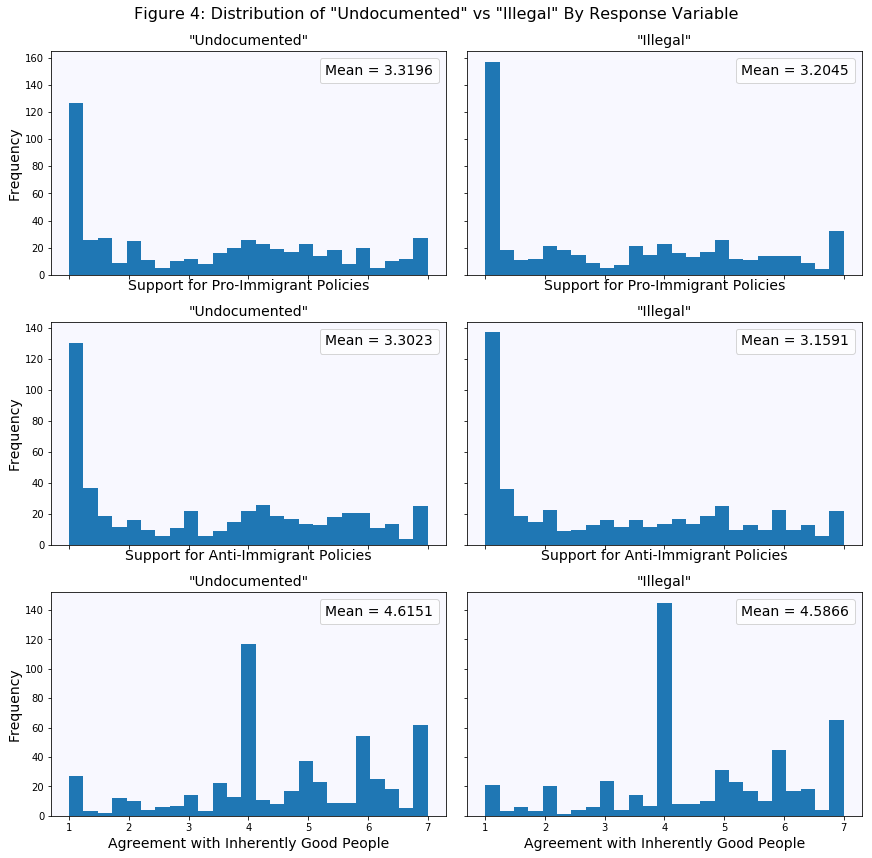

In [24]:
fig, ax = plt.subplots(3, 2, sharex='col', sharey='row',figsize=(12,12),constrained_layout=True)
fig.suptitle('Figure 4: Distribution of \"Undocumented\" vs \"Illegal\" By Response Variable\n', fontsize=16)
types = ['ProImmigrant', 'AntiImmigrant', 'InherentlyGood']
x_labels = ['Support for Pro-Immigrant Policies', 'Support for Anti-Immigrant Policies', 'Agreement with Inherently Good People']
IU = ['\"Undocumented\"', '\"Illegal\"']
for x in range(3):
    for y in range(2):
        ax[x][y].hist(data[data['illegal'] == y][types[x]], bins = 25, label = 'Mean = ' + str(round(data[data['illegal'] == y][types[x]].mean(),4)))
        ax[x][y].set_title(IU[y], fontsize=14)
        ax[x][y].set_xlabel(x_labels[x], fontsize=14)
        ax[x][y].set_facecolor('ghostwhite')
        if y == 0:
            ax[x][y].set_ylabel('Frequency', fontsize = 14)
        leg = ax[x][y].legend(handlelength=0, handletextpad=0, fancybox=True, fontsize = 14)
        for item in leg.legendHandles:
            item.set_visible(False)


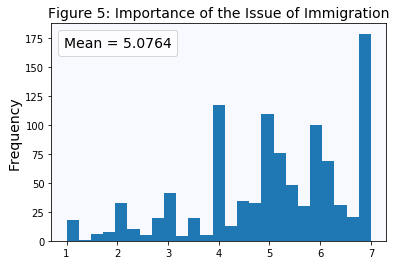

In [25]:
ax6 = data['importance'].plot(kind = 'hist', bins = 25, label = 'Mean = ' + str(round(data['importance'].mean(),4)))
ax6.set_title('Figure 5: Importance of the Issue of Immigration', fontsize = 14)
ax6.set_ylabel('Frequency',fontsize = 14)
ax6.set_facecolor('ghostwhite')
leg6 = ax6.legend(handlelength=0, handletextpad=0, fancybox=True, fontsize = 14)
for item in leg6.legendHandles:
    item.set_visible(False)
# plt.savefig('importance.jpeg')


In [15]:
###Anti-Immigrant Policy Models####
anti1 = sm.ols(formula="AntiImmigrant ~ illegal", data=data).fit(cov_type = 'HC3')
anti1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          AntiImmigrant   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.332
Date:                Mon, 10 Jun 2019   Prob (F-statistic):              0.249
Time:                        12:27:50   Log-Likelihood:                -2173.3
No. Observations:                1032   AIC:                             4351.
Df Residuals:                    1030   BIC:                             4360.
Df Model:                           1                                         
Covariance Type:                  HC3                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3023      0.088     37.523      0.000       3.130       3.475
illegal       -0.1431      0.124     -1.154      0.248      -0.386       0.100
==============================================================================
Omnibus:                     1663.636   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               91.169
Skew:                           0.349   Prob(JB):                     1.60e-20
Kurtosis:                       1.722   Cond. No.                         2.61
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

In [16]:
anti2 = sm.ols(formula="AntiImmigrant ~ illegal + Trump + Clinton + NativeAmerican", data=data).fit(cov_type = 'HC3')
anti2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          AntiImmigrant   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     246.5
Date:                Mon, 10 Jun 2019   Prob (F-statistic):          2.12e-148
Time:                        12:27:50   Log-Likelihood:                -1864.1
No. Observations:                1032   AIC:                             3738.
Df Residuals:                    1027   BIC:                             3763.
Df Model:                           4                                         
Covariance Type:                  HC3                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.7285      0.116     23.516      0.000       2.501       2.956
illegal           -0.0905      0.092     -0.980      0.327      -0.272       0.091
Trump              2.2661      0.129     17.561      0.000       2.013       2.519
Clinton           -0.7013      0.124     -5.657      0.000      -0.944      -0.458
NativeAmerican     1.3201      0.355      3.724      0.000       0.625       2.015
==============================================================================
Omnibus:                       49.977   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.032
Skew:                           0.556   Prob(JB):                     6.81e-13
Kurtosis:                       3.261   Cond. No.                         9.93
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

In [17]:
anti3 = sm.ols(formula="AntiImmigrant ~ illegal*importance + Male + Trump +Clinton + NativeAmerican", data=data).fit(cov_type = 'HC3')
anti3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          AntiImmigrant   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     183.3
Date:                Mon, 10 Jun 2019   Prob (F-statistic):          1.07e-175
Time:                        12:27:50   Log-Likelihood:                -1824.9
No. Observations:                1032   AIC:                             3666.
Df Residuals:                    1024   BIC:                             3705.
Df Model:                           7                                         
Covariance Type:                  HC3                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              1.2962      0.248      5.232      0.000       0.811       1.782
illegal               -0.0291      0.327     -0.089      0.929      -0.670       0.612
importance             0.2845      0.048      5.947      0.000       0.191       0.378
illegal:importance    -0.0136      0.064     -0.214      0.831      -0.138       0.111
Male                   0.2291      0.092      2.489      0.013       0.049       0.410
Trump                  1.9873      0.132     15.007      0.000       1.728       2.247
Clinton               -0.7701      0.124     -6.230      0.000      -1.012      -0.528
NativeAmerican         1.2728      0.329      3.873      0.000       0.629       1.917
==============================================================================
Omnibus:                       36.186   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.146
Skew:                           0.458   Prob(JB):                     3.16e-09
Kurtosis:                       3.264   Cond. No.                         51.5
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

In [18]:
###Pro-Immigrant Policy Models####
support1 = sm.ols(formula="ProImmigrant ~ illegal", data=data).fit(cov_type = 'HC3')
support1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ProImmigrant   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8556
Date:                Mon, 10 Jun 2019   Prob (F-statistic):              0.355
Time:                        12:27:51   Log-Likelihood:                -2176.8
No. Observations:                1032   AIC:                             4358.
Df Residuals:                    1030   BIC:                             4368.
Df Model:                           1                                         
Covariance Type:                  HC3                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3196      0.087     38.202      0.000       3.149       3.490
illegal       -0.1151      0.124     -0.925      0.355      -0.359       0.129
==============================================================================
Omnibus:                     1023.056   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.552
Skew:                           0.344   Prob(JB):                     2.65e-19
Kurtosis:                       1.768   Cond. No.                         2.61
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

In [19]:
support2 = sm.ols(formula="ProImmigrant ~ illegal + somecollege + Trump + Clinton + White", data=data).fit(cov_type = 'HC3')
support2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ProImmigrant   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     43.72
Date:                Mon, 10 Jun 2019   Prob (F-statistic):           6.04e-41
Time:                        12:27:51   Log-Likelihood:                -2090.8
No. Observations:                1032   AIC:                             4194.
Df Residuals:                    1026   BIC:                             4223.
Df Model:                           5                                         
Covariance Type:                  HC3                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.7532      0.183     20.507      0.000       3.394       4.112
illegal        -0.1213      0.115     -1.058      0.290      -0.346       0.103
somecollege    -0.4429      0.122     -3.644      0.000      -0.681      -0.205
Trump          -0.5962      0.149     -4.009      0.000      -0.888      -0.305
Clinton         0.9987      0.152      6.565      0.000       0.701       1.297
White          -0.6044      0.150     -4.033      0.000      -0.898      -0.311
==============================================================================
Omnibus:                      154.436   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.161
Skew:                           0.362   Prob(JB):                     3.87e-13
Kurtosis:                       2.102   Cond. No.                         6.26
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

In [20]:
support3 = sm.ols(formula="ProImmigrant ~ illegal*importance + somecollege + Trump + Clinton + White", data=data).fit(cov_type = 'HC3')
support3.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ProImmigrant   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     31.59
Date:                Mon, 10 Jun 2019   Prob (F-statistic):           8.12e-40
Time:                        12:27:51   Log-Likelihood:                -2090.1
No. Observations:                1032   AIC:                             4196.
Df Residuals:                    1024   BIC:                             4236.
Df Model:                           7                                         
Covariance Type:                  HC3                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              3.4323      0.346      9.921      0.000       2.754       4.110
illegal                0.1099      0.423      0.260      0.795      -0.719       0.939
importance             0.0659      0.059      1.125      0.261      -0.049       0.181
illegal:importance    -0.0448      0.081     -0.550      0.582      -0.204       0.115
somecollege           -0.4494      0.122     -3.673      0.000      -0.689      -0.210
Trump                 -0.6377      0.155     -4.124      0.000      -0.941      -0.335
Clinton                0.9854      0.153      6.453      0.000       0.686       1.285
White                 -0.5980      0.151     -3.973      0.000      -0.893      -0.303
==============================================================================
Omnibus:                      165.057   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.288
Skew:                           0.352   Prob(JB):                     3.63e-13
Kurtosis:                       2.085   Cond. No.                         52.3
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

In [21]:
###Inherently Good Models####
good1 = sm.ols(formula="InherentlyGood ~ illegal", data=data).fit(cov_type = 'HC3')
good1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         InherentlyGood   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.08108
Date:                Mon, 10 Jun 2019   Prob (F-statistic):              0.776
Time:                        12:27:51   Log-Likelihood:                -1951.7
No. Observations:                1032   AIC:                             3907.
Df Residuals:                    1030   BIC:                             3917.
Df Model:                           1                                         
Covariance Type:                  HC3                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6151      0.071     64.722      0.000       4.475       4.755
illegal       -0.0285      0.100     -0.285      0.776      -0.225       0.168
==============================================================================
Omnibus:                       34.414   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.871
Skew:                          -0.351   Prob(JB):                     3.26e-07
Kurtosis:                       2.549   Cond. No.                         2.61
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

In [22]:
good2 = sm.ols(formula="InherentlyGood ~ illegal + Masters + Trump + Clinton", data=data).fit(cov_type = 'HC3')
good2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         InherentlyGood   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     26.59
Date:                Mon, 10 Jun 2019   Prob (F-statistic):           5.17e-21
Time:                        12:27:51   Log-Likelihood:                -1900.8
No. Observations:                1032   AIC:                             3812.
Df Residuals:                    1027   BIC:                             3836.
Df Model:                           4                                         
Covariance Type:                  HC3                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.4841      0.109     41.251      0.000       4.271       4.697
illegal       -0.0273      0.096     -0.285      0.776      -0.215       0.160
Masters        0.3447      0.135      2.553      0.011       0.080       0.609
Trump         -0.4641      0.127     -3.667      0.000      -0.712      -0.216
Clinton        0.6405      0.120      5.337      0.000       0.405       0.876
==============================================================================
Omnibus:                       31.467   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.005
Skew:                          -0.328   Prob(JB):                     1.37e-06
Kurtosis:                       2.556   Cond. No.                         4.72
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

In [23]:
good3 = sm.ols(formula="InherentlyGood ~ illegal*importance + Masters + Trump + Clinton", data=data).fit(cov_type = 'HC3')
good3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         InherentlyGood   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     18.44
Date:                Mon, 10 Jun 2019   Prob (F-statistic):           2.00e-20
Time:                        12:27:51   Log-Likelihood:                -1899.4
No. Observations:                1032   AIC:                             3813.
Df Residuals:                    1025   BIC:                             3847.
Df Model:                           6                                         
Covariance Type:                  HC3                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              4.2588      0.274     15.532      0.000       3.721       4.796
illegal               -0.0835      0.369     -0.227      0.821      -0.806       0.639
importance             0.0490      0.052      0.945      0.344      -0.053       0.151
illegal:importance     0.0119      0.072      0.166      0.868      -0.128       0.152
Masters                0.3414      0.135      2.536      0.011       0.078       0.605
Trump                 -0.5198      0.130     -4.014      0.000      -0.774      -0.266
Clinton                0.6272      0.120      5.221      0.000       0.392       0.863
==============================================================================
Omnibus:                       32.184   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.163
Skew:                          -0.341   Prob(JB):                     7.66e-07
Kurtosis:                       2.564   Cond. No.                         51.2
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""